In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
#Importation des bibliothèques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Importation de fichier CSV Test_V2 et creation de dataframe df_test
df_test = pd.read_csv("../input/data-set/Test_v2.csv")

In [4]:
#Importation de fichier CSV Train_V2 et creation de dataframe df_train
df_Train = pd.read_csv("../input/data-set/Train_v2.csv")

In [5]:
#Affichage de dataframe df_test
df_test.head()

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_6056,Urban,Yes,3,30,Male,Head of Household,Married/Living together,Secondary education,Formally employed Government
1,Kenya,2018,uniqueid_6060,Urban,Yes,7,51,Male,Head of Household,Married/Living together,Vocational/Specialised training,Formally employed Private
2,Kenya,2018,uniqueid_6065,Rural,No,3,77,Female,Parent,Married/Living together,No formal education,Remittance Dependent
3,Kenya,2018,uniqueid_6072,Rural,No,6,39,Female,Head of Household,Married/Living together,Primary education,Remittance Dependent
4,Kenya,2018,uniqueid_6073,Urban,No,3,16,Male,Child,Single/Never Married,Secondary education,Remittance Dependent


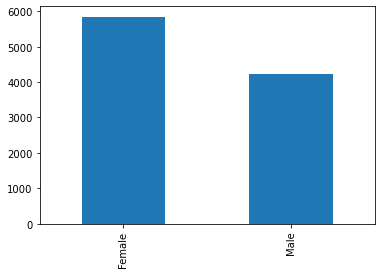

In [6]:
#Visualisation nombre des female par rapport au nombre male
df_test.gender_of_respondent.value_counts().plot.bar()

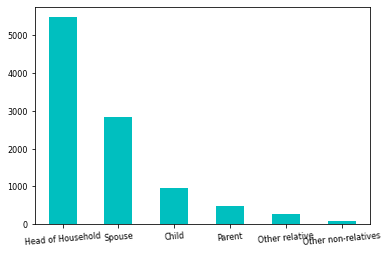

In [7]:
#Visualisation de la nature de relation des mombres
df_test.relationship_with_head.value_counts().plot.bar(color='c', rot=5, fontsize=8)

In [8]:
#Affichage de dataframe df_train
df_Train.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


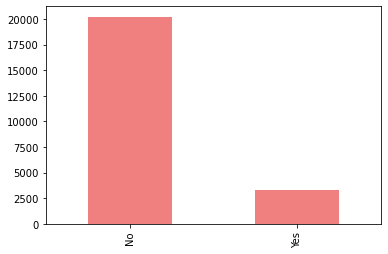

In [9]:
#Visualisation de nombre des membres qui possèdent un compte bancaire
df_Train.bank_account.value_counts().plot.bar(color='lightcoral');

In [10]:
df_Train.shape

(23524, 13)

In [11]:
df_Train['bank_account'].value_counts()

No     20212
Yes     3312
Name: bank_account, dtype: int64

In [12]:
#vérification de type des colonnes de dataframe df_test
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10086 entries, 0 to 10085
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 10086 non-null  object
 1   year                    10086 non-null  int64 
 2   uniqueid                10086 non-null  object
 3   location_type           10086 non-null  object
 4   cellphone_access        10086 non-null  object
 5   household_size          10086 non-null  int64 
 6   age_of_respondent       10086 non-null  int64 
 7   gender_of_respondent    10086 non-null  object
 8   relationship_with_head  10086 non-null  object
 9   marital_status          10086 non-null  object
 10  education_level         10086 non-null  object
 11  job_type                10086 non-null  object
dtypes: int64(3), object(9)
memory usage: 945.7+ KB


In [13]:
#vérification de type des colonnes de dataframe df_Train
df_Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


In [14]:
#Affichge de la somme des valeur Null de dataframe df_test (dans cette cas il y a aucun valeur Null)
df_test.isnull().sum()

country                   0
year                      0
uniqueid                  0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

In [15]:
#Affichge de la somme des valeur Null de dataframe df_train (dans cette cas il y a aucun valeur Null)
df_Train.isnull().sum()

country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

In [16]:
#Convertire le colonne bank account au format entier (données numériques) en utilisant label encoder from sklearn
from sklearn.preprocessing import LabelEncoder
lc = LabelEncoder()
df_Train['bank_account'] = lc.fit_transform(df_Train['bank_account'])
df_Train.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,1,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,0,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,1,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,0,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,0,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [17]:
df_Train.shape

(23524, 13)

In [18]:
df1 = df_Train[df_Train['bank_account'] == 1]

In [19]:
df1.shape

(3312, 13)

In [20]:
df2 = df_Train[df_Train['bank_account'] == 0]

In [21]:
df2.shape

(20212, 13)

In [22]:
df2.drop(df2.tail(15000).index, axis=0, inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [23]:
df2.shape

(5212, 13)

In [24]:
frames = [df1, df2]
df_Train2 = pd.concat(frames)

In [25]:
df_Train2

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,1,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
2,Kenya,2018,uniqueid_3,1,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
8,Kenya,2018,uniqueid_9,1,Rural,Yes,3,54,Male,Head of Household,Married/Living together,Secondary education,Farming and Fishing
11,Kenya,2018,uniqueid_12,1,Rural,Yes,3,69,Male,Head of Household,Married/Living together,Secondary education,Other Income
17,Kenya,2018,uniqueid_18,1,Rural,Yes,6,27,Female,Head of Household,Married/Living together,Secondary education,Self employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6817,Rwanda,2016,uniqueid_750,0,Rural,Yes,5,50,Female,Head of Household,Married/Living together,Primary education,Informally employed
6818,Rwanda,2016,uniqueid_751,0,Rural,Yes,6,38,Male,Head of Household,Married/Living together,No formal education,Farming and Fishing
6820,Rwanda,2016,uniqueid_753,0,Rural,No,5,30,Male,Head of Household,Married/Living together,No formal education,Informally employed
6821,Rwanda,2016,uniqueid_754,0,Rural,Yes,5,61,Male,Head of Household,Married/Living together,Primary education,Farming and Fishing


In [26]:
#Ajouter une autre colonne nomée year pour les deux dataframe
df_Train2['year_'] = df_Train2['year']
df_test['year_'] = df_test['year']

# Convertit les colonnes household_size,age_of_respondent,year en flottant
float_array = df_Train2[['household_size', 'age_of_respondent', 'year_']].values.astype(float)
float_array = df_test[['household_size', 'age_of_respondent', 'year_']].values.astype(float)

In [27]:
# convertir des entités catégorielles en entités numériques
df_Train2['country_'] = df_Train2['country']
df_test['country_'] = df_test['country']

categ = ['relationship_with_head', 'marital_status', 'education_level', 'job_type', 'country_']

#  transformer une catégorie au format entier en plusieurs colonnes au format binaire
df_Train2 = pd.get_dummies(df_Train2, prefix_sep='_', columns = categ)
df_test = pd.get_dummies(df_test, prefix_sep='_', columns = categ)

# convertir les colonnes (location_type,cellphone_access,gender_of_respondent) de deux dataframes au format entier
df_Train2['location_type'] = lc.fit_transform(df_Train2['location_type'])
df_Train2['cellphone_access'] = lc.fit_transform(df_Train2['cellphone_access'])
df_Train2['gender_of_respondent'] = lc.fit_transform(df_Train2['gender_of_respondent'])

df_test['location_type'] = lc.fit_transform(df_test['location_type'])
df_test['cellphone_access'] = lc.fit_transform(df_test['cellphone_access'])
df_test['gender_of_respondent'] = lc.fit_transform(df_test['gender_of_respondent'])

In [28]:
#Affichage dataframe df test avec la nouvelle transformation des données
df_test.head()

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,year_,relationship_with_head_Child,...,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed,country__Kenya,country__Rwanda,country__Tanzania,country__Uganda
0,Kenya,2018,uniqueid_6056,1,1,3,30,1,2018,0,...,0,0,0,0,0,0,1,0,0,0
1,Kenya,2018,uniqueid_6060,1,1,7,51,1,2018,0,...,0,0,0,0,0,0,1,0,0,0
2,Kenya,2018,uniqueid_6065,0,0,3,77,0,2018,0,...,0,0,0,0,1,0,1,0,0,0
3,Kenya,2018,uniqueid_6072,0,0,6,39,0,2018,0,...,0,0,0,0,1,0,1,0,0,0
4,Kenya,2018,uniqueid_6073,1,0,3,16,1,2018,1,...,0,0,0,0,1,0,1,0,0,0


In [29]:
#Affichage dataframe df train avec la nouvelle transformation des données
df_Train2.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,year_,...,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed,country__Kenya,country__Rwanda,country__Tanzania,country__Uganda
0,Kenya,2018,uniqueid_1,1,0,1,3,24,0,2018,...,0,0,0,0,0,1,1,0,0,0
2,Kenya,2018,uniqueid_3,1,1,1,5,26,1,2018,...,0,0,0,0,0,1,1,0,0,0
8,Kenya,2018,uniqueid_9,1,0,1,3,54,1,2018,...,0,0,0,0,0,0,1,0,0,0
11,Kenya,2018,uniqueid_12,1,0,1,3,69,1,2018,...,0,0,0,1,0,0,1,0,0,0
17,Kenya,2018,uniqueid_18,1,0,1,6,27,0,2018,...,0,0,0,0,0,1,1,0,0,0


In [30]:
#Partitionner les données

from sklearn.model_selection import train_test_split
X = df_Train2.drop(['year', 'uniqueid', 'bank_account', 'country'], axis=1)
y = df_Train2['bank_account']
[X_train,X_test,y_train,y_test]=train_test_split(X,y,test_size=0.2)

In [31]:
print("Train dataset size: {}/{}".format(len(X_train),len(y)))
print("Test dataset size: {}/{}".format(len(X_test),len(y)))

Train dataset size: 6819/8524
Test dataset size: 1705/8524


In [32]:
#Nous comparerons ces 3 classeurs sur les mêmes données partitionnées. Commençons par le initialisation du classeur que nous comparerons.
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier 
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
linear_svm =SVC(kernel='linear') 
neural=MLPClassifier(hidden_layer_sizes=(10,),activation='relu',solver='adam')

In [33]:
rf = RandomForestRegressor(n_estimators = 2000, random_state = 42)
linear_svm =SVC(kernel='linear') 
neural=MLPClassifier(hidden_layer_sizes=(100,20),activation='relu',solver='adam')

In [34]:
#Maintenant, nous allons passer au processus d'apprentissage avec l'utilisation de la fonction fit ().
linear_svm.fit(X_train,y_train)
neural.fit(X_train,y_train)
rf.fit(X_train, y_train);

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100, 20), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

MLPClassifier(hidden_layer_sizes=(100, 20))

In [35]:
#Maintenant, nous allons tester les modèles appris
y_linear_svm=linear_svm.predict(X_test)
y_neural=neural.predict(X_test)
y_rf = rf.predict(X_test)

In [36]:
#Évaluation des performances
print ('************* Peformance Evauation of Linear SVM **************')
print(confusion_matrix(y_test,y_linear_svm))
print(classification_report(y_test,y_linear_svm))

print ('************* Peformance Evauation of Neural Network **************')
print(confusion_matrix(y_test,y_neural))
print(classification_report(y_test,y_neural))

print ('************* Peformance Evauation of rf **************')
print(confusion_matrix(y_test,y_rf.round()))
print(classification_report(y_test,y_rf.round()))
print(accuracy_score(y_test, y_rf.round()))

************* Peformance Evauation of Linear SVM **************
[[906 124]
 [209 466]]
              precision    recall  f1-score   support

           0       0.81      0.88      0.84      1030
           1       0.79      0.69      0.74       675

    accuracy                           0.80      1705
   macro avg       0.80      0.78      0.79      1705
weighted avg       0.80      0.80      0.80      1705

************* Peformance Evauation of Neural Network **************
[[1002   28]
 [ 357  318]]
              precision    recall  f1-score   support

           0       0.74      0.97      0.84      1030
           1       0.92      0.47      0.62       675

    accuracy                           0.77      1705
   macro avg       0.83      0.72      0.73      1705
weighted avg       0.81      0.77      0.75      1705

************* Peformance Evauation of rf **************
[[855 175]
 [216 459]]
              precision    recall  f1-score   support

           0       0.80      0

In [44]:
# créer un DataFrame pour les nouveau données
df_result = pd.DataFrame({"uniqueid": df_test["uniqueid"] + " x " + df_test["country"],"bank_account": df_Train2.bank_account})

In [41]:
df_result.head()

,uniqueid,bank_account
0,uniqueid_6056 x Kenya,1.0
1,uniqueid_6060 x Kenya,0.0
2,uniqueid_6065 x Kenya,1.0
3,uniqueid_6072 x Kenya,0.0
4,uniqueid_6073 x Kenya,0.0


In [39]:
# Créer un fichier csv pour les resultat
df_result.to_csv('resuktFile.csv', index = False)